<a href="https://colab.research.google.com/github/Jan-Piotraschke/fachkurs_systembiology/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install scipy pandas numpy matplotlib

from scipy.integrate import odeint
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
# parameters
k_RL = 2 * 10 ** 6
k_RLm = 10 ** -2
k_Rs = 4
k_Rd0 = 4 * 4 ** -4
k_Rd1 = k_Rd0 * 10
k_G1 = 1
k_Ga = 10 ** -5

Gt = 10 ** 4  # total number of G proteins per cell
L =  10 ** -6  # alpha-factor -> 1 uM



In [3]:
def solve_ode_system(current_state, t, parameter) -> list:
    """

    :param current_state: current state of the ODE system
    :param t: time of simulation
    :param parameter: rate constant for G protein deactivation
    :return: solution of the ODE System
    """
    R, RL, G, Ga = current_state

    # variable parameter
    k_Gd = parameter

    # algebraic equations:
    Gd = Gt - G - Ga  # Galpha-GDP
    Gbg = Gt - G  # free Gbetagamma

    # the ODEs ahead:
    dR_dt = -k_RL*L*R + k_RLm*RL - k_Rd0*R + k_Rs
    dRL_dt = k_RL*L*R - k_RLm*RL - k_Rd1*RL
    dG_dt = -k_Ga*RL*G + k_G1*Gd*Gbg
    dGa_dt = k_Ga*RL*G - k_Gd*Ga

    return [dR_dt, dRL_dt, dG_dt, dGa_dt]



In [4]:
time = np.arange(0, 600, 0.01)

# initial values
# TODO: dummy values -> didn't found the real values yet
R_0 = 5000  # free receptor
RL_0 = 500  # receptor bound to ligand
G_0 = 500  # inactive heterotrimeric G protein
Ga_0 = 500  # active Galpha-GTP
S0 = [R_0, RL_0, G_0, Ga_0]

# variable rate constant for G protein deactivation
k_Gd = 0.004   # 0.11  # 0.004
solution = odeint(solve_ode_system, S0, time, args=(k_Gd,))



No handles with labels found to put in legend.
No handles with labels found to put in legend.


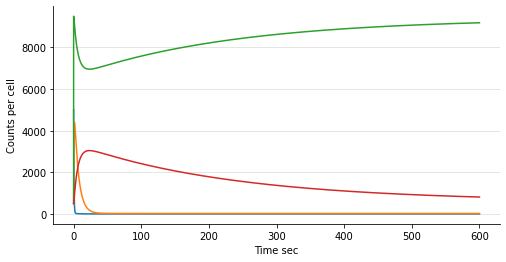

In [5]:
fig = plt.figure(1, figsize=(8, 4))

# choose the style of the plot
# print(plt.style.available)
# plt.style.use('classic')

ax = plt.axes()
ax.set_xlabel("Time sec")
ax.set_ylabel("Counts per cell")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

plt.plot(time, solution)

# ax.axhline(y=ICU_capacity, color='gray',alpha = 0.4, label='ICU Capacity')
# plt.legend(loc=(1.1,0.5), frameon=False)
plt.legend(frameon=False)

# ax.xaxis.set_ticks([0,60,120])
# ax.set_xlim(0,200)
# ax.set_ylim(0,5000)
ax.yaxis.grid(alpha=0.4)

# plt.savefig('GA_Deaths_40days.png', dpi=600, bbox_inches='tight')

plt.show()